# <center>1000 companies profit prediction

#### First we wil be importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
import klib as k

### Import data from the system to start analyse

In [3]:
data=pd.read_csv('./1000_Companies.csv') 


### After uploading the data,we start to check the entire data to fetch duplicates,null values and also to drop un wanted columns

In [4]:
data.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.tail()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D_Spend,1000.0,81668.927200,46537.567891,0.00,43084.500000,79936.00000,124565.500000,165349.20
Administration,1000.0,122963.897612,12613.927535,51283.14,116640.684850,122421.61215,129139.118000,321652.14
Marketing_Spend,1000.0,226205.058419,91578.393542,0.00,150969.584600,224517.88735,308189.808525,471784.10
Profit,1000.0,119546.164656,42888.633848,14681.40,85943.198543,117641.46630,155577.107425,476485.43


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D_Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing_Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [8]:
data.isnull().mean()*100

R&D_Spend          0.0
Administration     0.0
Marketing_Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [9]:
data.duplicated().sum()

1

In [10]:
# droping duplicated values
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

# Univariate analysis

### By doing univariate anaysis we can understand the data and also identify outlier values

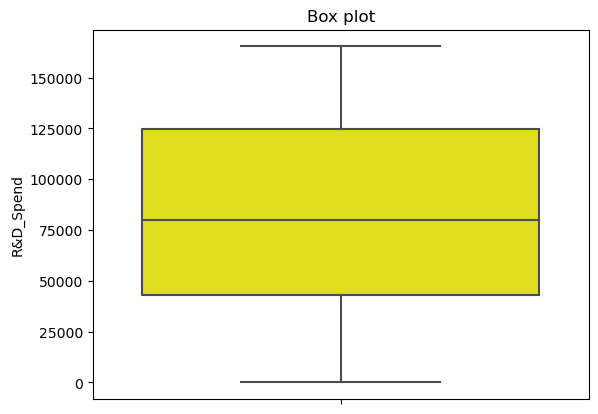

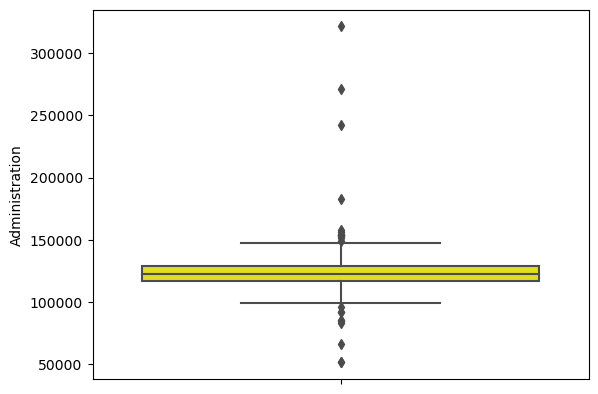

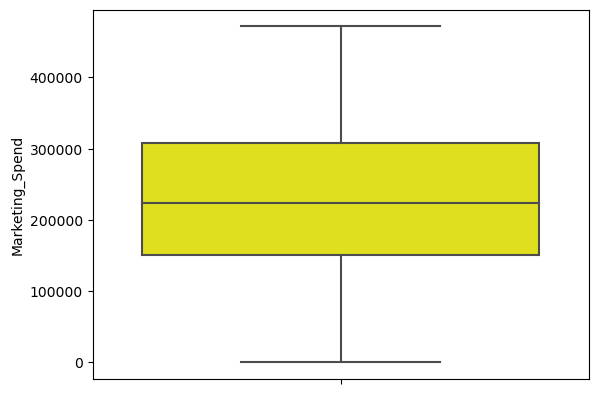

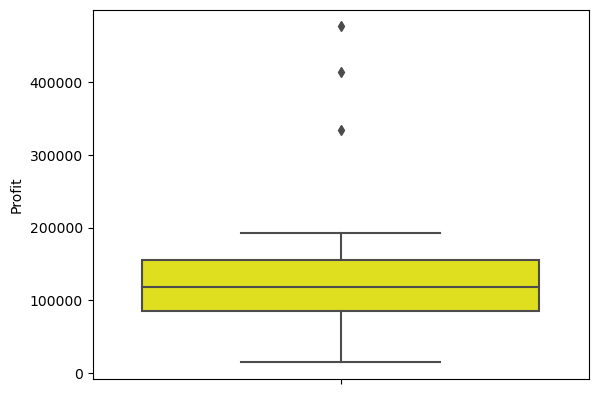

In [12]:
plt.title('Box plot')
for i in data.columns:
    if data[i].dtypes!='object':
        sns.boxplot(y=data[i],color='yellow')
        plt.show()

# Removing outliers

### By plotting box plot we could understand that there is a lot of outliers in the data,so we start to remove those outliers

In [13]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5%IQR
    return UL,LL

In [14]:
for column in data.columns:
    if data[column].dtypes!='object':
        UL,LL=outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

In [15]:
data.isnull().mean()*100

R&D_Spend          25.025025
Administration     26.326326
Marketing_Spend    25.025025
State               0.000000
Profit             25.325325
dtype: float64

In [16]:
data.dropna(inplace=True)

In [17]:
data.isnull().mean()*100

R&D_Spend          0.0
Administration     0.0
Marketing_Spend    0.0
State              0.0
Profit             0.0
dtype: float64

### After finding and treating outliers,then we resume to plot balance univarieate values

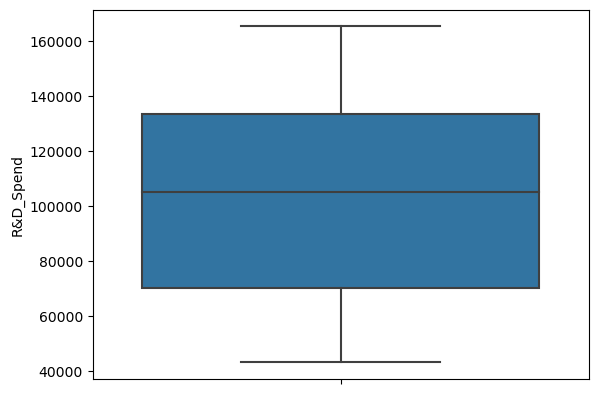

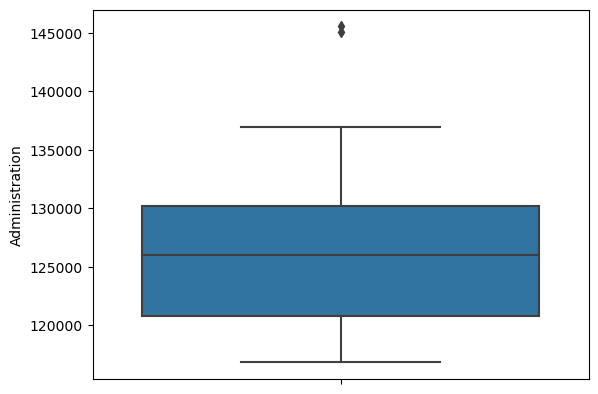

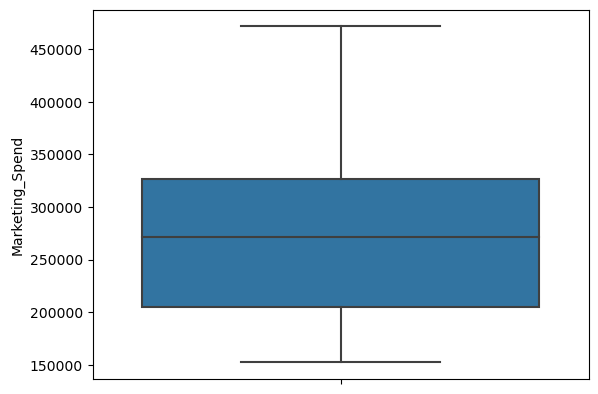

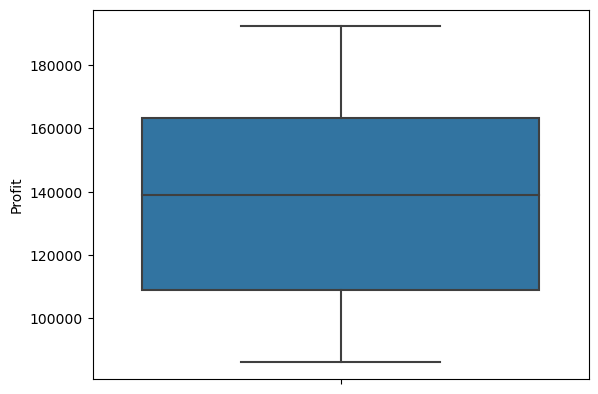

In [18]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

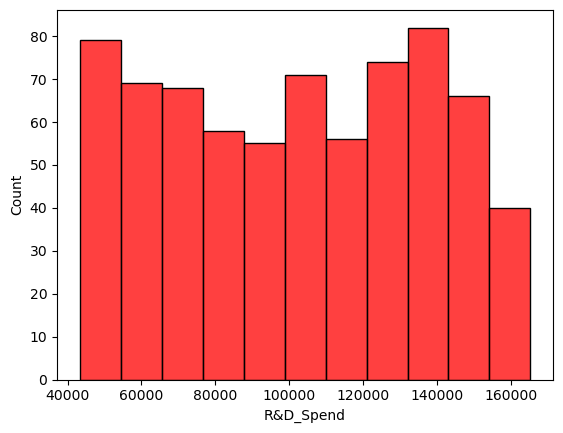

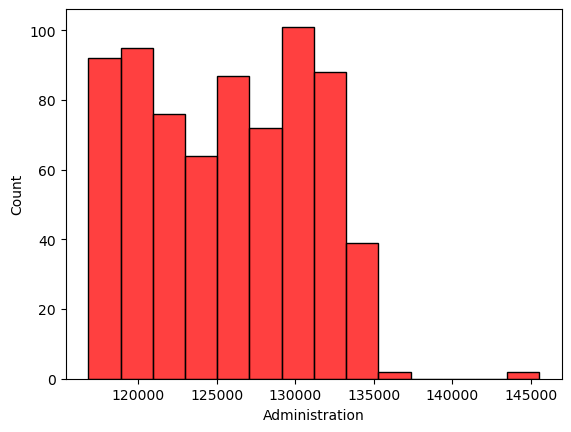

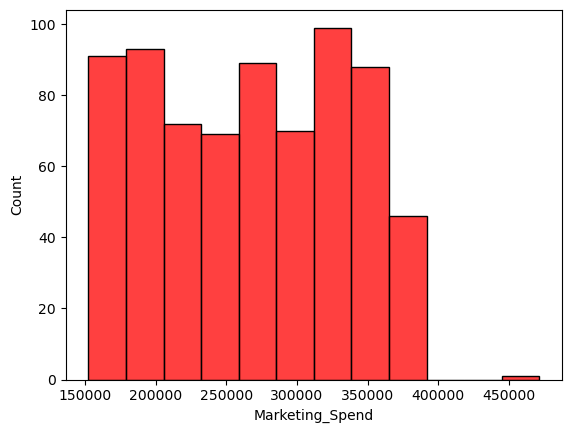

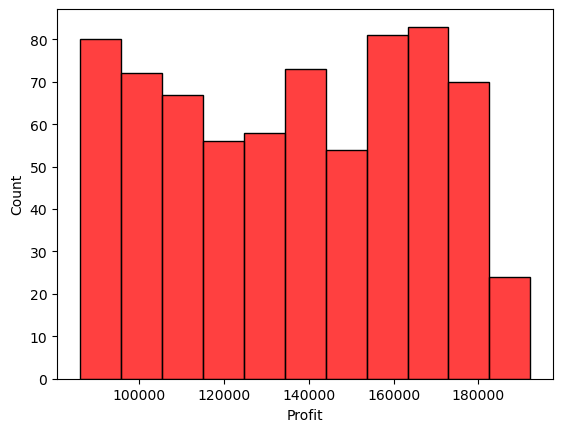

In [19]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.histplot(x=data[i],color='red')
        plt.show()

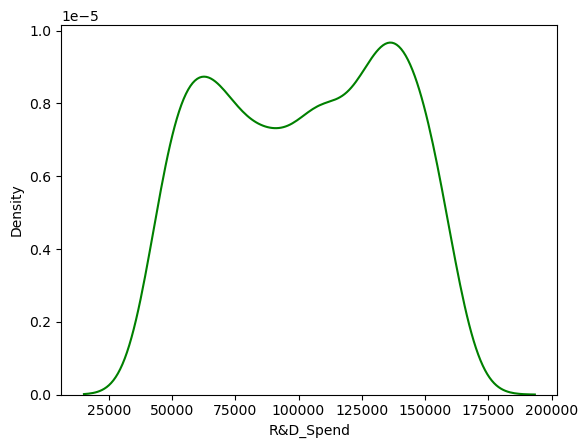

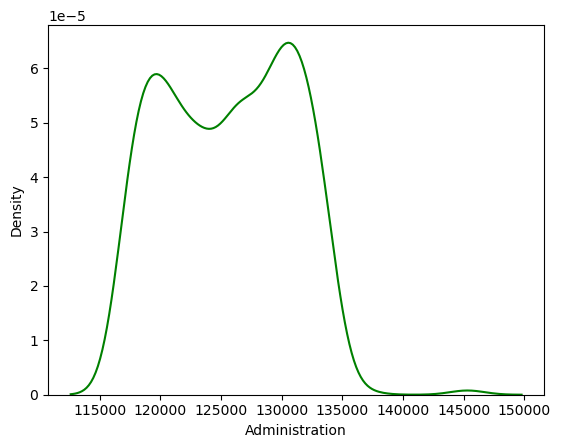

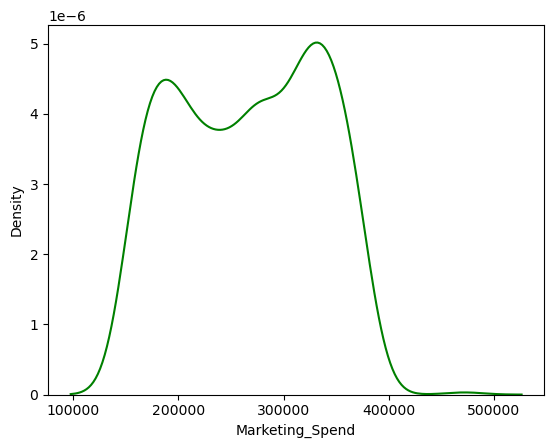

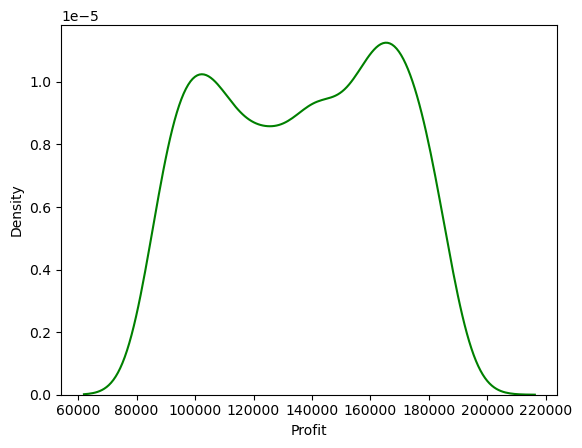

In [20]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.kdeplot(x=data[i],color='green')
        plt.show()

# Multy variate anlysis

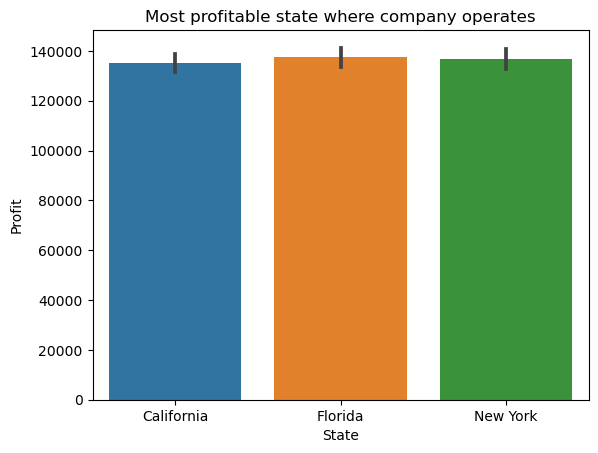

In [21]:
sns.barplot(x='State',y='Profit',data=data.sort_values(by='State',ascending=True))
plt.title('Most profitable state where company operates')
plt.style.use('fivethirtyeight')
plt.show()

### we can clearly see that california ,florida and new york city are the most profitable city where companies could earn more profit.If a company start in these states they can earn more profit than other states

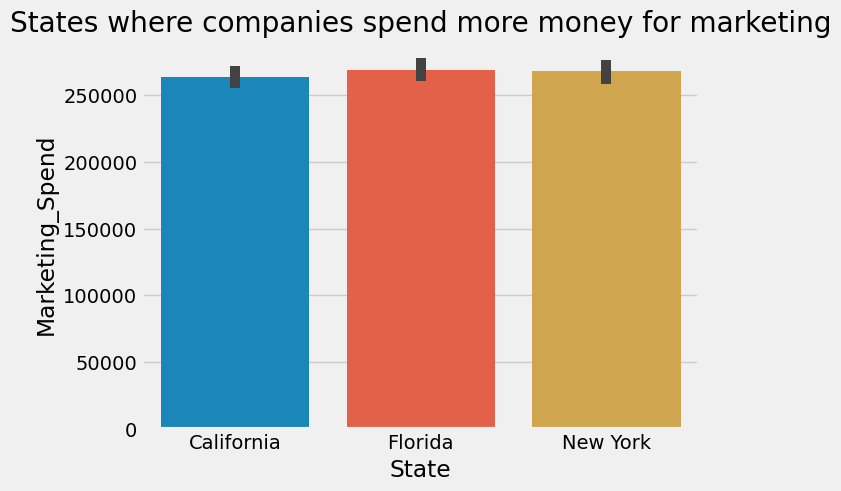

In [22]:
sns.barplot(x='State',y='Marketing_Spend',data=data.sort_values(by='State',ascending=True))
plt.title('States where companies spend more money for marketing')
plt.style.use('fivethirtyeight')
plt.show()

### By analysing the graph we can see companies spend more money for marketng in california,florida and newyork.

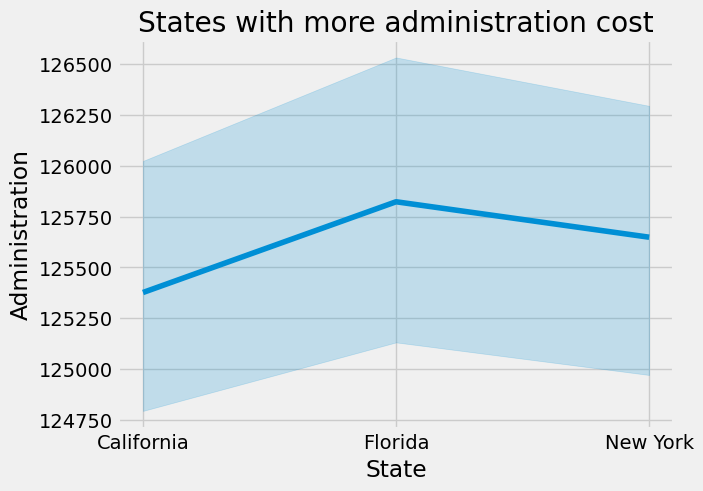

In [23]:
sns.lineplot(x='State',y='Administration',data=data.sort_values(by='State',ascending=True))
plt.title('States with more administration cost')
plt.style.use('fivethirtyeight')
plt.show()

### California,florida and new york states have more administration cost

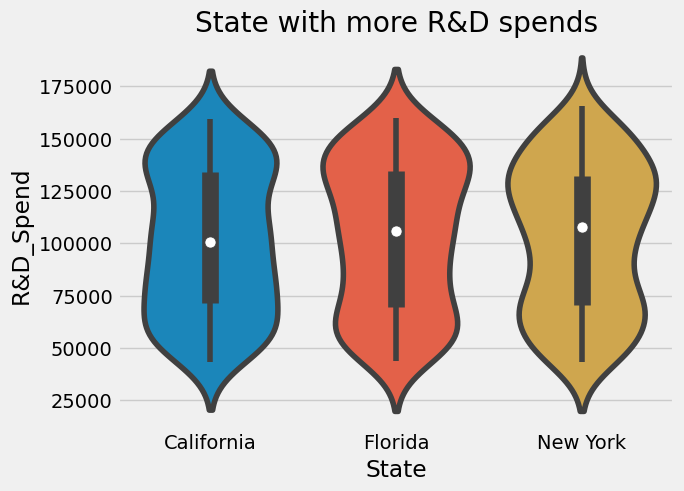

In [24]:
sns.violinplot(x='State',y='R&D_Spend',data=data.sort_values(by='State',ascending=True))
plt.title('State with more R&D spends')
plt.style.use('fivethirtyeight')
plt.show()

### california ,florida and new yok states had cost more R&D spends

# Label encoding

### now we label encode the columns to change its dtype

In [25]:
le=LabelEncoder()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 996
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D_Spend        718 non-null    float64
 1   Administration   718 non-null    float64
 2   Marketing_Spend  718 non-null    float64
 3   State            718 non-null    object 
 4   Profit           718 non-null    float64
dtypes: float64(4), object(1)
memory usage: 33.7+ KB


In [27]:
data['State']=le.fit_transform(data['State'],)


In [28]:
data.sample(10)

,R&D_Spend,Administration,Marketing_Spend,State,Profit
282,63481.0,119832.2588,191265.8020,1,103264.16970
471,62322.0,119661.0924,189029.5084,2,102274.04600
691,76485.0,121752.7488,216357.0555,1,114373.37460
855,145733.0,131979.6089,349971.2607,1,173531.34350
872,56671.0,118826.5270,178125.8884,2,97446.44542
378,157947.0,133783.4280,373538.2070,1,183965.65830
386,66932.0,120341.9182,197924.5160,2,106212.32920
674,113466.0,127214.2713,287711.9960,2,145965.92380
637,84231.0,122896.7134,231302.9837,0,120990.71560
442,132750.0,130062.2203,324920.5267,2,162440.07860


# Checking correlation with target value

### our target value is companies profit,we check correlation of every column with target value

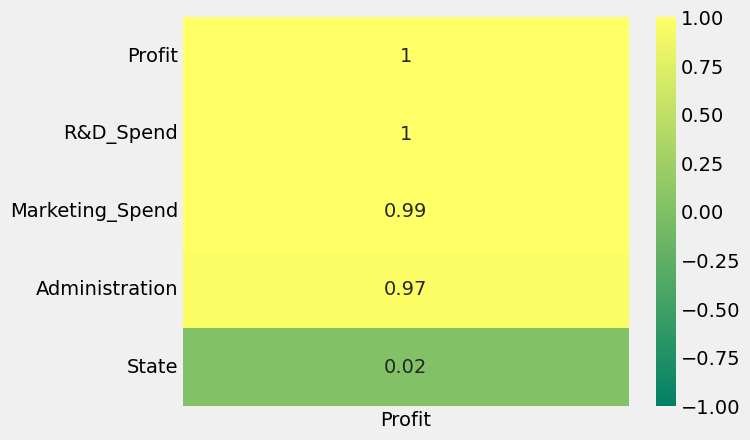

In [29]:
sns.heatmap(data.corr()[["Profit"]].sort_values(by="Profit", ascending=False), vmin=-1, vmax=1, annot=True,cmap="summer");

# Feature scaling

### after checking the correlation we choose values with high correlation only and use robustscaler to scale the values

In [30]:
# select highly correlated values
x=data[['R&D_Spend','Administration','Marketing_Spend','State']].values
y=data[['Profit']].values

In [31]:
rs=RobustScaler()

In [32]:
x=rs.fit_transform(x)


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Cross validation

In [34]:
models={
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [35]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  99.919407820856
training_score:  99.86420015276903
testing_score:  99.919407820856
mae:  175.52840707173607
mse:  747039.415058
rmse_test:  864.3144190964305
****************************************************************************************************
model trained with Ridge
r2score:  99.8286659757376
training_score:  99.78741233330514
testing_score:  99.8286659757376
mae:  326.1283473462262
mse:  1588159.9259876178
rmse_test:  1260.2221732645469
****************************************************************************************************
model trained with LinearSVR
r2score:  -2001.5261210634883
training_score:  -2103.021884738673
testing_score:  -2001.5261210634883
mae:  136199.76336709235
mse:  19479841107.202766
rmse_test:  139570.20135832278
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  99.58577857164724
training_sco

### 

# proceed with linearegresson

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)


In [37]:
model=LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x)

In [40]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [41]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,192261.83,190871.319044
1,182901.99,172986.153784
2,155752.60,159867.586772
3,141585.52,129128.315749
4,134307.35,127428.616667


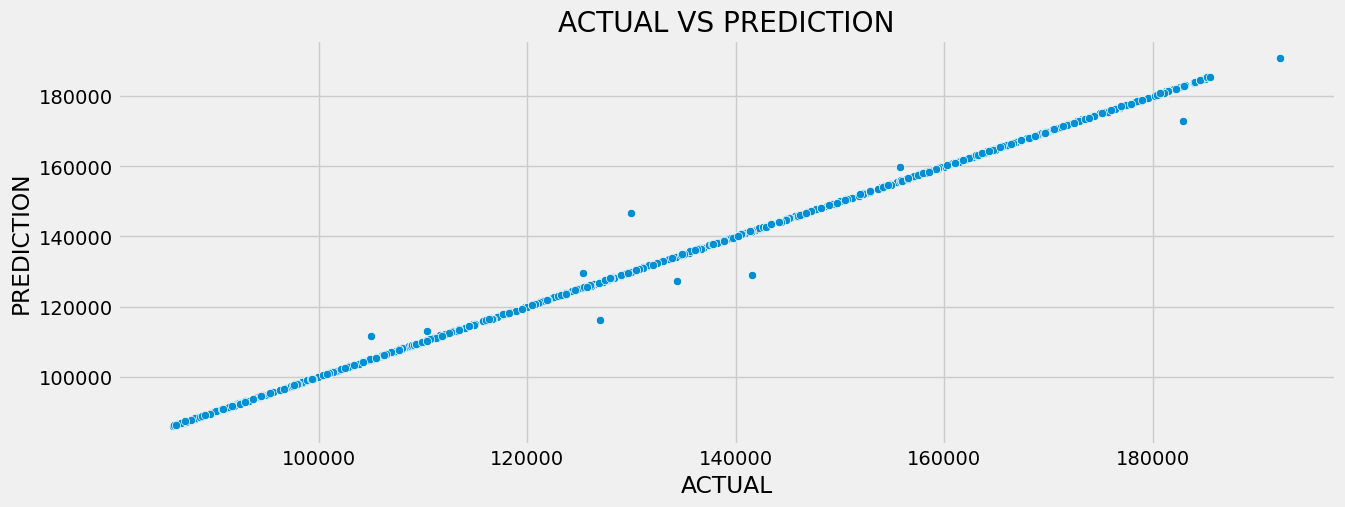

In [42]:
plt.figure(figsize=(14,5))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");
plt.style.use('fivethirtyeight')